In [1]:
%load_ext autoreload
%autoreload 2

from notebooks.notebook_utils import *
import boolformer
from boolformer import load_boolformer

# Noiseless model
Use this model to predict logical circuits when you have access to the whole truth table. Can only handle input dimension up to 10

In [2]:
boolformer_noiseless = load_boolformer(mode='noiseless')

Loaded noiseless model


In [9]:
inputs = np.array([  
    [False, False],
    [False, True ],
    [True , False],
    [True , True ],
])
outputs1 = np.array([False, False, False, True])
outputs2 = np.array([True, False, False, True])
inputs = [inputs, inputs]
outputs = [outputs1, outputs2]
pred_trees, error_arr, complexity_arr = boolformer_noiseless.fit(inputs, outputs, verbose=False, beam_size=10, beam_type="search")

for pred_tree in pred_trees:
    pred_tree.treelib().show()
    #display(boolformer_noiseless.env.simplifier.get_simple_infix(pred_tree, simplify_form='basic'))
    #display(pred_tree.graphviz())

and
├── x_0
└── x_1

or
├── and
│   ├── x_0
│   └── x_1
└── not
    └── or
        ├── x_0
        └── x_1



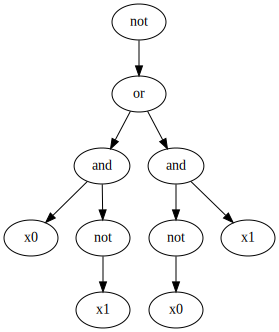

not,or,and,x_0,not,x_1,and,not,x_0,x_1


In [10]:
display(pred_tree.graphviz())
print(pred_tree.prefix())

Error, complexity: [0.0, 0.0, 0.0], [4, 3, 7]
Predicted trees: 


(x_0 & x_2) | (x_1 & x_3 & (x_0 | x_2))

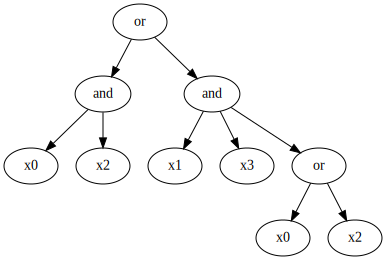

(x_1 | x_3) & ~(x_1 & x_3)

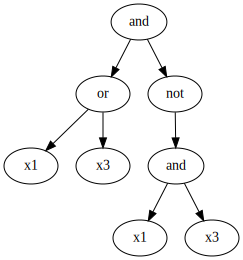

~((x_0 & x_1 & x_3 & ~x_2) | (x_1 & x_2 & x_3 & ~x_0) | (x_0 & x_2 & ~(x_1 & x_3)) | ~(x_0 | x_2 | (x_1 & x_3)))

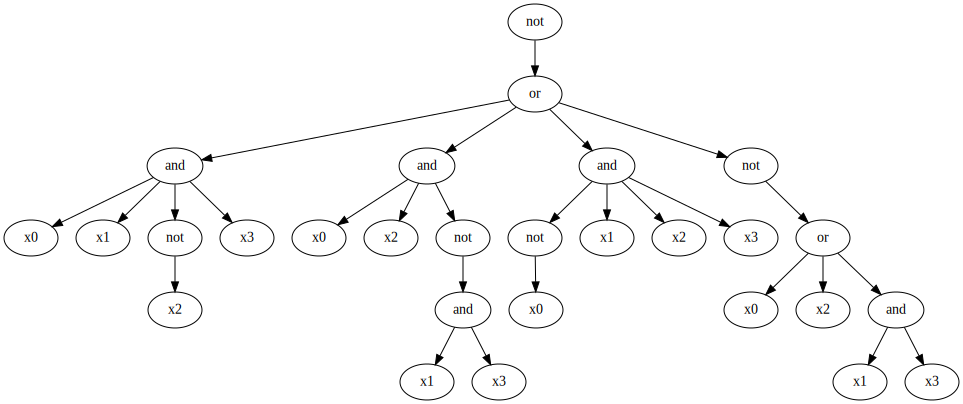

In [13]:
tree, n_vars = get_logical_circuit(function_name='adder_2')
inputs, outputs, val_inputs, val_outputs = generate_data(tree, n_vars=n_vars, n_points=None)
pred_trees, error_arr, complexity_arr = boolformer_noiseless.fit(inputs, outputs, verbose=False, beam_size=50, beam_type="search")

print(f"Error, complexity: {error_arr}, {complexity_arr}")
print("Predicted trees: ")
for pred_tree in pred_trees:
    display(boolformer_noiseless.env.simplifier.get_simple_infix(pred_tree, simplify_form='basic'))
    display(pred_tree.graphviz())

# Noisy model
Use this model to predict a boolean function which approximates a set of (possibly noisy observation) with up to 80 input variables (but only up to 6 active variables)

In [6]:
boolformer_noisy = load_boolformer('noisy')

Loaded noisy model


## PMLB

F1 scores : 
RandomForestClassifier_1       : 0.9924877203120485
RandomForestClassifier_100     : 0.9944927536231885
LogisticRegression             : 0.963777680011732
Boolformer                     : 0.9380555555555555


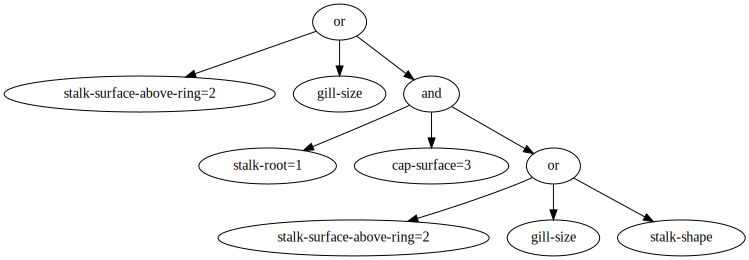

In [30]:
dataset_name = 'mushroom'

(inputs, outputs, val_inputs, val_outputs, dictionary) = get_data_pmlb('mushroom', 
                                    binarize_categorical=True,
                                    verbose=False,
                                    max_points=1000)
acc, f1, tree = run_models(boolformer_noisy, inputs, outputs, val_inputs, val_outputs, 
                            beam_size=5, 
                            verbose=False)

print("F1 scores : ")
for method_name, f1_score in f1.items():
    print(f"{method_name:30s} : {f1_score}")
tree.relabel_variables(dictionary)
display(tree.graphviz())